#**Flipkart Reviews Sentiment Analysis using python**



In [2]:
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
data = pd.read_csv('/content/drive/MyDrive/CSV files/data.csv')
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [40]:
print(data.isnull().sum())

review    0
rating    0
label     0
dtype: int64


In [5]:
pd.unique(data['rating'])

array([5, 4, 1, 3, 2])

In [8]:
sns.set_theme(style="whitegrid")

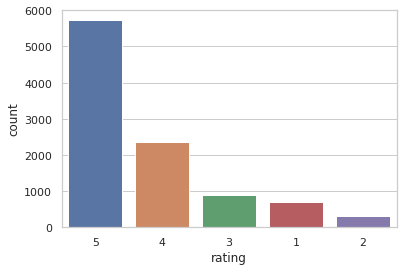

In [9]:
sns.countplot(data = data, x='rating', order = data.rating.value_counts().index)

In [11]:
sen_neg = []
for i in range(len(data['rating'])):
  if data['rating'][i]>=5:
    sen_neg.append(1)
  else:
    sen_neg.append(0)

data['label'] = sen_neg

In [21]:
from tqdm import tqdm
  
  
def written_text(text_data):
    written_text = []
  
    for sentence in tqdm(text_data):
        # Removing punctuations
        sentence = re.sub(r'[^\w\s]', '', sentence)
  
        # Converting lowercase and removing stopwords
        written_text.append(' '.join(token.lower()
                                          for token in nltk.word_tokenize(sentence)
                                          if token.lower() not in stopwords.words('english')))
  
    return written_text

In [22]:
data.head()

,review,rating,label
0,It was nice produt. I like it's design a lot. ...,5,1
1,awesome sound....very pretty to see this nd th...,5,1
2,awesome sound quality. pros 7-8 hrs of battery...,4,0
3,I think it is such a good product not only as ...,5,1
4,awesome bass sound quality very good bettary l...,5,1


In [23]:
data["label"].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       0
3       1
4       1
       ..
9971    1
9972    1
9973    1
9974    1
9975    1
Name: label, Length: 9976, dtype: int64>

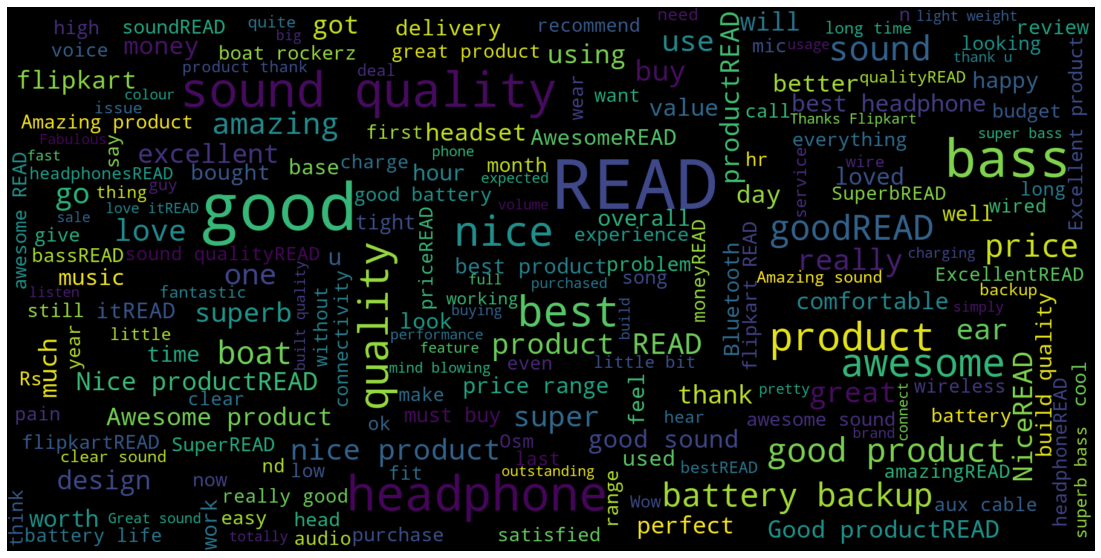

In [30]:
#creation of wordcloud
strong_word = ' '.join(
    word for word in data['review'][data['label'] == 1].astype(str))
wordCloud = WordCloud(width=1800, height=900,
                      random_state=24, max_font_size=115)
plt.figure(figsize=(20, 10))
plt.imshow(wordCloud.generate(strong_word), interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['review'] ).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],
                                                    test_size=0.33,
                                                    stratify=data['label'],
                                                    random_state = 42)

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)
  
#testing the model
y_pred = model.predict(X_train)
print("Accuracy: ",accuracy_score(y_train,y_pred))

Accuracy:  0.9364058057758492


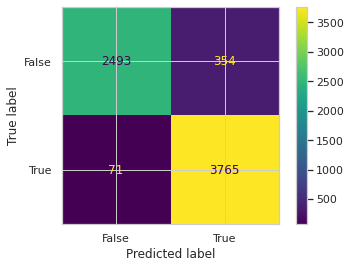

In [43]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train,pred)
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
                                            display_labels = [False, True])
  
cm_display.plot()
plt.show()

In [47]:
ratings = data['rating'].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(data,values=quantity,names=numbers,hole=0.5)
figure.show()